In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy import signal
from scipy.fft import fft, fftshift
import os.path as os
from scipy.fftpack import fft, ifft
from scipy.signal import filtfilt, butter

In [5]:
carpeta = os.abspath('/Users/yann/Documents/Datos/EEG/') #localización del 
#archivo en tu computadora
datos = pd.read_csv(carpeta +'/H24_OC_OA.csv') #creación de un dataframe
#al que únicamente debes modificar el nombre del archivo con su extensión
datos #comando para presentar el dataframefm=128 #frecuencia de muestreo
fm=128
ti=0 #tiempo de inicio, debe ser número entero
tf=180 #tiempo final, debe ser número entero
pt=(tf-ti)*fm#numero de puntos
t1=ti*fm #nos ayuda a dar la posición de la fila para el tiempo inicial
t2=tf*fm #nos ayuda a dar la posición de la fila para el tiempo final
nombres=list(datos) #almacena los nombres de los encabezados en una lista
t=np.linspace(ti,tf,pt) 
filtg=[]
for i in range (0,14):
    al=np.array(datos)[t1:t2,i]
    nyq = 128*0.5 #frecuencia de muestreo y ripple
    low = 2 / nyq #ancho de banda inferior
    high = 45 / nyq #ancho de banda superior
    b, a = butter(3, [low, high], btype='band') #filtro de orden 3
    env = filtfilt(b, a, al)
    filtg.append(env)
tmp=pd.DataFrame(filtg, nombres)
datosfilt=tmp.transpose()
datosfilt


,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,EEG.P8,EEG.T8,EEG.FC6,EEG.F4,EEG.F8,EEG.AF4
0,-0.128496,-0.004399,-1.469067,0.270211,0.058634,-0.508915,-0.217883,-1.391201,-1.115832,-0.443911,-0.428767,-0.474621,-1.323994,-0.246727
1,7.671067,7.011786,12.871696,6.287464,3.310929,9.740998,17.376371,15.454531,17.197943,19.321944,10.905300,11.897454,11.931317,13.137052
2,8.033013,16.089285,16.956630,13.258683,1.122358,10.210517,25.038911,19.081265,20.845004,15.754805,8.490137,8.969693,6.744544,11.959070
3,-2.168620,8.793873,8.480013,8.918432,-1.874214,8.181461,22.318835,8.906341,5.190716,-3.212725,-2.299727,-1.518214,-7.828871,-0.572966
4,-6.903274,-3.254394,-0.884019,-1.186795,2.679588,7.886220,18.877838,-4.008122,-7.782132,-6.974407,-3.407644,-4.354934,-5.869413,-2.897676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23035,11.146999,20.319526,4.890808,11.313464,14.357408,8.653156,5.212346,9.629029,10.883352,10.217472,6.693151,-1.681891,11.982120,10.696170
23036,9.757597,16.580722,-1.352441,7.721112,6.386291,0.633796,-5.002812,-4.360598,-0.631860,-5.382822,-8.930875,-7.620935,0.350823,1.781615
23037,10.028386,7.667015,7.047453,9.501885,-1.320009,-6.186195,-16.372522,-12.033577,-2.834473,-2.733871,-9.008043,-1.365510,-3.191554,2.816388
23038,7.667414,3.481073,13.842084,9.369325,-2.713827,-7.032514,-18.276471,-11.212975,-0.372908,6.084994,0.640885,4.562803,-0.124273,5.307917


## Transformada de Fourier


La transformada de Fourier es una herramienta matemática que permite descomponer una señal o función en una suma de funciones sinusoidales de diferentes frecuencias. Esto proporciona una representación en el dominio de la frecuencia de la señal o función original, lo que permite analizarla y manipularla de una manera más sencilla y eficiente. En otras palabras, la TF nos dice qué frecuencias están presentes en una señal y con qué intensidad.

Tiene aplicaciones en el análisis de señales, que serán relevantes en este notebook y los siguientes de la serie. Sirve para identificar las diferentes frecuencias que componen una señal, como las señales que se obtienen de técnicas como EEG superficial y EMG superficial. También funciona para comprimir señales al eliminar información redundante de la señal y dejar fuera frecuencias que no son del interés del análisis.

Hay dos aplicaciones puntuales que nos interesan para EEG.
* Identificación de bandas de frecuencia: La TF permite identificar y cuantificar la potencia espectral en diferentes bandas de frecuencia de interés, como las ondas alfa, beta, theta y delta, que se asocian con diferentes estados cognitivos y fisiológicos.

* Visualizar espectrogramas: La TF puede usarse para generar espectrogramas, que son representaciones visuales de la potencia espectral del EEG en función del tiempo y la frecuencia, lo que facilita la identificación de patrones y tendencias en la actividad cerebral.

## FFT

Son las siglas de Fast Fourier Transform, es decir: Transformada Rápida de Fourier. Es un algoritmo eficiente para calcular la Transformada Discreta de Fourier (DFT) y su inversa. La DFT es una herramienta matemática fundamental en el procesamiento de señales digitales que permite descomponer una señal en sus componentes de frecuencia. Indica qué frecuencias y con qué intensidad están representadas en la señal. 

Aplicaciones de la FFT:

* Fisiología: Se utiliza para analizar señales de electrocardiograma (ECG), electroencefalograma (EEG) y otras señales biomédicas.
* Electroencefalograma (EEG): La FFT se utiliza para analizar las diferentes bandas de frecuencia de las ondas cerebrales (delta, theta, alfa, beta y gamma), permitiendo evaluar el estado de alerta, la atención, la somnolencia, la actividad convulsiva y otras funciones cognitivas. 

Ventajas de la FFT:

* Eficiencia: La FFT es un algoritmo muy eficiente que puede calcular la DFT de manera rápida y precisa, incluso para señales largas y complejas.
* Versatilidad: La FFT se puede aplicar a una amplia variedad de tipos de señales, incluyendo señales de audio, imágenes, datos científicos y señales de control.
* Precisión: La FFT proporciona resultados precisos y confiables para el análisis de frecuencia de señales.



Text(0.5, 1.0, ' Transformada de Fourier de EEG')

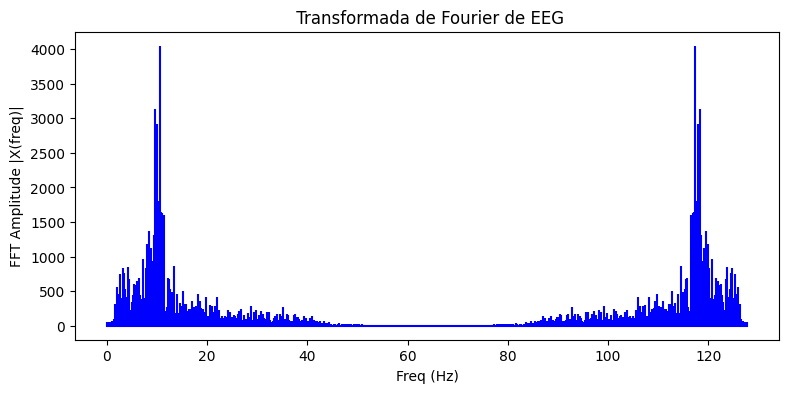

In [6]:
ta=5
tb=10
t_a=fm*ta
t_b=fm*tb
datosf=np.array(datosfilt)[t_a:t_b,7]
X = fft(datosf)
N = len(X)
n = np.arange(N)
T = N/fm
freq = n/T 

plt.figure(figsize = (20,4 ))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.title(' Transformada de Fourier de EEG')

(0.0, 64.0)

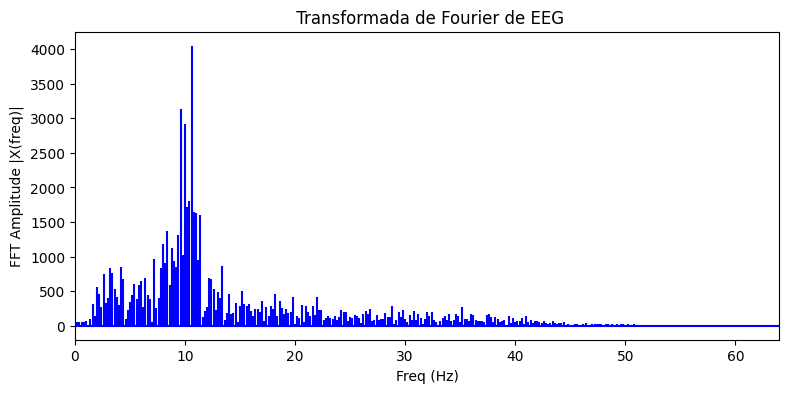

In [7]:
plt.figure(figsize = (20,4 ))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.title(' Transformada de Fourier de EEG')
plt.xlim(0,64)

Las frecuencia de interés en este caso se encuentran en máximo 45 Hz. Con esta visualización tenemos una primera aproximación a las componentes de la señal, aunque se recomiendan otras visualizaciones que obtendremos más adelante.

## STFT con ventana de Bartlett

### STFT

La transformada de Fourier de corto tiempo (STFT) es una técnica para analizar señales no estacionarias, como las señales de audio o las señales de electroencefalografía (EEG). La STFT divide la señal en segmentos de tiempo cortos y luego aplica la transformada de Fourier a cada segmento. Esto permite obtener información tanto en el dominio del tiempo como en el de la frecuencia. Para aplicarla usamos los siguientes pasos: 

* División de la señal: La señal se divide en segmentos de tiempo cortos de longitud fija.
* Ventana: Se aplica una ventana a cada segmento para reducir la distorsión por ventana.
* Transformada de Fourier: Se aplica la transformada de Fourier a cada segmento de ventana.
* Cálculo de la magnitud y la fase: Se calcula la magnitud y la fase de los coeficientes de Fourier.
* Espectrograma: Se organiza la información de magnitud y fase en una matriz llamada espectrograma.

### Ventana de Bartlett 

La elección de una ventana está condicionada por varios factores, como la naturaleza de la señal, la precisión deseada y el tiempo de procesamiento disponible. En general, se recomienda utilizar la ventana de Bartlett cuando se desea reducir la distorsión por ventana y obtener una buena concentración espectral. Se define como:

$ w(n) = 1 - \frac{2}{N} \left( n - \frac{N-1}{2} \right)^2 $ 

donde N es la longitud de la ventana.

Tiene una serie de características relevantes para esta aplicación. Su forma es simétrica, tiene un ancho de banda amplio, tiene una buena concentración espectral. Además reduce la distorsión por ventana, la varianza de la estimación espectral y aumenta la resolución de frecuencia.


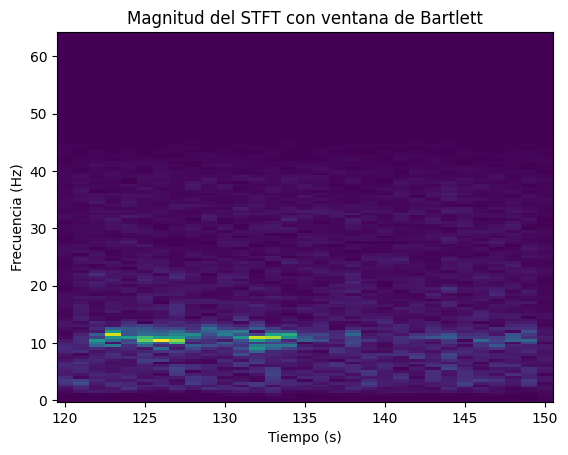

In [9]:
# Parámetros de entrada
nc=6
ti_a=120
tf_a=150
pt=(tf_a-ti_a)*fm
t1_a=ti_a*fm
t2_a=tf_a*fm
t=np.linspace(ti_a,tf_a,pt) 
N = pt
Fs = 128  # Frecuencia de muestreo
T = 1.0 / Fs  # Periodo de muestreo
N_muestras = N * T  # Número total de muestras

# Datos de la señal
y = np.array(datosfilt)[t1_a:t2_a, 6]
longitud_senal = len(y)
longitud_ventana = 256
# Ventana de Bartlett
ventana = scipy.signal.windows.bartlett(longitud_ventana)  # Ajustar la longitud según sea necesario

# Seleccionar longitud de ventana y superposición
  # Ajustar según sus necesidades
superposicion = 128  # Ajustar según sus necesidades

# Asegurar una superposición válida
superposicion = min(longitud_ventana - 1, max(0, superposicion))

# Resolución de frecuencia
resolucion_frecuencia = Fs / float(longitud_ventana)

# Calcular STFT con ventana de Bartlett
f, t, Zxx = scipy.signal.stft(y, fs=Fs, window=ventana, nperseg=longitud_ventana, noverlap=superposicion)

# Visualizar la magnitud del STFT
plt.pcolormesh(t+ti_a, f, np.abs(Zxx), shading='auto')
plt.title('Magnitud del STFT con ventana de Bartlett')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.show()

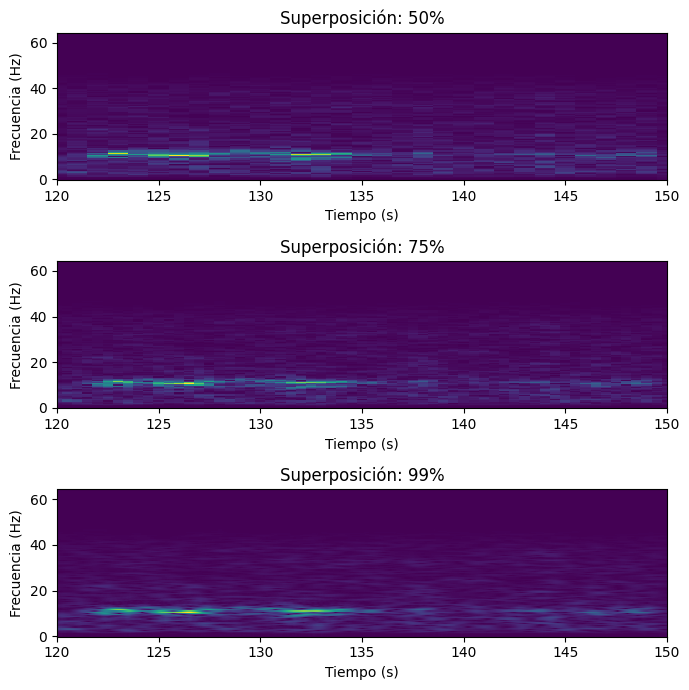

In [10]:
# Parámetros de entrada
fm=128 #frecuencia de muestreo
N = pt
# Frecuencia de muestreo
T = 1.0 / fm  # Periodo de muestreo
t=np.arange(ti_a, tf_a, 1.0 / fm)
N_muestras = N * T  # Número total de muestras
longitud_ventana=256

# Datos de la señal
y = np.array(datosfilt)[t1_a:t2_a, 6]
longitud_senal = len(y)

# Ventana de Bartlett
ventana = scipy.signal.windows.bartlett(longitud_ventana)  # Ajustar la longitud según sea necesario

# Definir superposiciones
superposiciones = [0.5, 0.75, 0.99]

# Figuras para las gráficas
fig, axs = plt.subplots(len(superposiciones), 1,figsize=(7, 7))

for i, superposicion in enumerate(superposiciones):
    # Ajustar la superposición
    noverlap = int(longitud_ventana * superposicion)

    # Calcular STFT
    f, t, Zxx = scipy.signal.stft(y, fs=fm, window=ventana, nperseg=longitud_ventana, noverlap=noverlap)

    # Visualizar la magnitud del STFT
    axs[i].pcolormesh(t+ti_a, f, np.abs(Zxx), shading='auto')
    axs[i].set_title(f'Superposición: {superposicion:.0%}')
    axs[i].set_xlabel('Tiempo (s)')
    axs[i].set_xlim([ti_a, tf_a])
    axs[i].set_ylabel('Frecuencia (Hz)')
plt.tight_layout()
plt.show()

* Fourier
* Welch
* Espectrogramas
* Ventana de Bartlett

### ¿Cómo afecta la superposición de ventanas ?
1. Reducción de la varianza: La superposición promedia múltiples segmentos de la señal, lo que reduce la varianza de la estimación espectral. Esto significa que la estimación espectral será más precisa y estable, especialmente para señales con baja potencia.

2. Aumento de la resolución en frecuencia: La superposición aumenta el número de puntos de frecuencia que se estiman, lo que mejora la resolución en frecuencia del análisis. Esto permite observar detalles más finos en el espectro de la señal.

3. Reducción de la distorsión por ventana: La superposición reduce la distorsión por ventana, que se produce cuando la ventana seleccionada no captura completamente la periodicidad de la señal. Esto mejora la precisión de la estimación espectral, especialmente para señales con transitorios o cambios rápidos en la frecuencia.

4. Aumento del tiempo de procesamiento: La superposición aumenta el tiempo de procesamiento necesario para calcular la transformada de Fourier de corto tiempo (STFT). Esto se debe a que se requiere calcular la STFT para cada segmento de la señal superpuesta.

5. Pérdida de información temporal: La superposición puede provocar la pérdida de información temporal, ya que se promedian segmentos de la señal que no son contiguos en el tiempo. Esto puede ser un problema para el análisis de señales que contienen eventos transitorios o cambios rápidos en la amplitud.

Text(0.5, 1.0, 'Espectrograma de Signal120a 150 segundos, abierto electrodoEEG.O1')

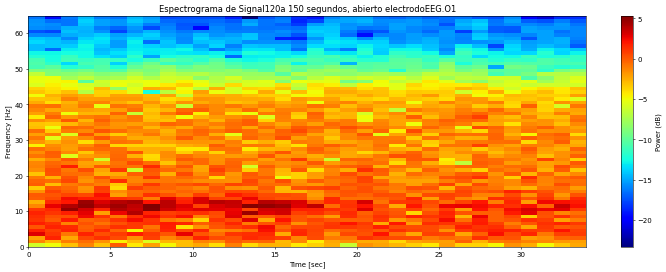

In [11]:
datos_a=np.array(datosfilt)[t1_a:t2_a,6]
f, t, sxx = signal.spectrogram(datos_a,128,nperseg=128,scaling='spectrum')
plt.figure(figsize=(18,6),dpi=50) 
plt.pcolormesh(np.log(sxx),cmap='jet') 
plt.ylabel('Frequency [Hz]') 
plt.xlabel('Time [sec]') 
plt.colorbar(label='Power (dB)') 
plt.title('Espectrograma de Signal'+ str(ti_a) + 'a ' + str(tf_a)+ ' segundos, abierto electrodo'
                    +str(nombres[6])) #plt.ylim(0,500)

Text(0.5, 1.0, 'Espectrograma de Signal123a 133 segundos, cerradoEEG.O1')

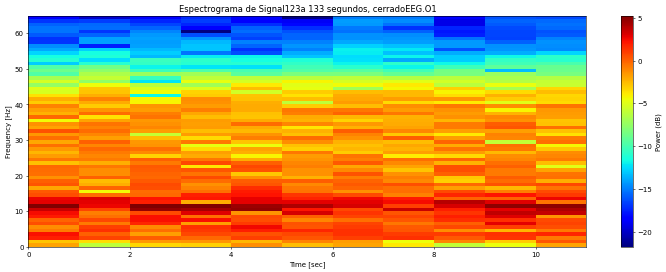

In [13]:
ti_b=123 #tiempo de inicio, debe ser número entero
tf_b=133 #tiempo final, debe ser número entero
pt_b=(tf_b-ti_b)*fm#numero de puntos
t1_b=ti_b*fm #nos ayuda a dar la posición de la fila para el tiempo inicial
t2_b=tf_b*fm
t_b=np.linspace(ti_b,tf_b,pt)
datos_b=np.array(datosfilt)[t1_b:t2_b,6]
f, t, sxx = signal.spectrogram(datos_b,128,nperseg=128,scaling='spectrum')
plt.figure(figsize=(18,6),dpi=50) 
plt.pcolormesh(np.log(sxx),cmap='jet') 
plt.ylabel('Frequency [Hz]') 
plt.xlabel('Time [sec]') 
plt.colorbar(label='Power (dB)') 
plt.title('Espectrograma de Signal'+ str(ti_b) + 'a ' + str(tf_b)+ ' segundos, cerrado'
                     +str(nombres[6])) #plt.ylim(0,500)

* Comparar Espectrograma default de Signal con ejercicio de Bartlett


Hacer la interpretación fisiológica. En ojos abiertos la actividad está más difusa. En ojos cerrados la actividad se concentra alrededor de la banda alfa. 

Tres visualizaciones.

### Picos en PSD:
Hacer un análisis de densidad de Potencia Espectral nos ayuda a identificar en qué bandas de frecuencia se concentra la mayor actividad. Para mejorar la visualización se hizo una separación por bandas.
### Histograma con potencia relativa
Nos encontramos con otra forma de visualizar los datos a partir de hacer una integración numérica para obtener las potencias debajo de la gráfica de Densidad de Potencia Espectral. De esta forma, a parte de cuantificar la proporción de actividad que corresponde a cada banda podemos...

### Espectrograma comparando actividad de ojos abiertos y ojos cerrados.
Hacer la interpretación fisiológica. En ojos abiertos la actividad está más difusa. En ojos cerrados la actividad se concentra alrededor de la banda alfa. 

Cuando tenemos actividad en ojos abiertos, la actividad se difunde por un espectro ancho de frecuencias. En cambio cuando teneos actividad en alfa observamos un patrón de coloración más oscuro en la banda alfa.

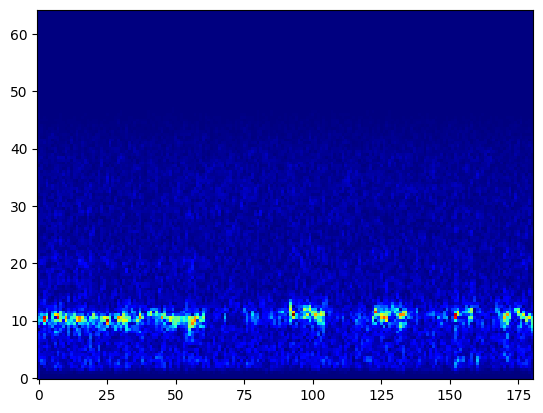

In [14]:
samples = np.array(datosfilt)[t1:t2,6]
f, t, Zxx = signal.stft(samples, fs=128)
plt.pcolormesh(t, f, np.abs(Zxx), cmap=plt.cm.jet)